In [152]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [153]:
# Updated temperature data for three cities (2024)
City1 = np.array([26.4, 27.5, 29.0, 30.4, 29.5, 28.8, 28.3, 28.2, 28.2, 27.6, 27.0, 26.5])  # Ho Chi Minh City (Tropical)
City2 = np.array([14.4, 15.2, 15.9, 17.2, 18.3, 20.0, 22.2, 22.8, 22.2, 19.4, 16.7, 14.4])  # Los Angeles (Mediterranean)
City3 = np.array([5.0, 5.5, 8.5, 11.0, 15.0, 17.5, 20.0, 20.0, 16.5, 12.0, 7.5, 5.5])  # Paris (Oceanic)

# Combine into a 2D NumPy array
Cities = np.array([City1, City2, City3])
# Create DataFrame
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

Task 1

In [154]:
# Compute statistical insights
overall_mean = np.mean(Cities)
overall_std = np.std(Cities)
mean_per_city = np.mean(Cities, axis=1)
std_per_city = np.std(Cities, axis=1)

# Organizing results in a DataFrame for better visualization
city_names = ["Ho Chi Minh City", "Los Angeles", "Paris"]
stats_df = pd.DataFrame({
    "City": city_names,
    "Mean Temperature (°C)": mean_per_city,
    "Standard Deviation (°C)": std_per_city
})

# Adding overall statistics
overall_stats = pd.DataFrame({
    "City": ["Overall"],
    "Mean Temperature (°C)": [overall_mean],
    "Standard Deviation (°C)": [overall_std]
})

# Combine both tables
stats_df = pd.concat([stats_df, overall_stats], ignore_index=True)

# Print the DataFrame
display(stats_df)

,City,Mean Temperature (°C),Standard Deviation (°C)
0,Ho Chi Minh City,28.116667,1.150242
1,Los Angeles,18.225000,2.947633
2,Paris,12.000000,5.435225
3,Overall,19.447222,7.564555


Task 2

In [155]:
# This subroutine encapsulates the 'plot' method, as the most suitable for faster rendering
def DrawBox(x, y, size, r, g, b):
    for i in range(0, int(size)):
        r = max(0, min(255, r))
        g = max(0, min(255, g))
        b = max(0, min(255, b))
        plt.plot([x, x + size], [y + i, y + i], '#{:02x}{:02x}{:02x}'.format(r, g, b))

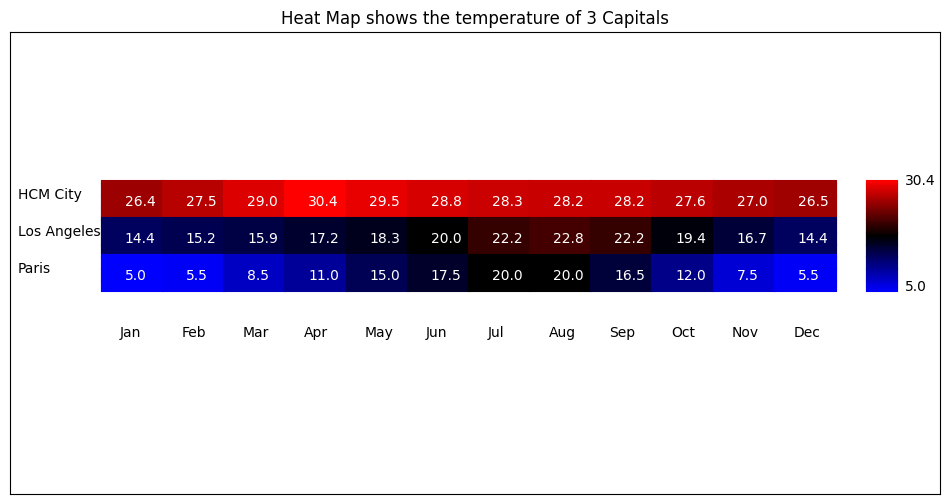

In [ ]:
threshold1 = np.median(Cities)
threshold2 = int(0)
# User specifies the threshold value
# Get user input for threshold value with validation
while True:
    try:
        threshold1 = int(input(f"Enter a threshold temperature ({np.min(Cities)} to {np.max(Cities)}): "))
        if np.min(Cities) <= threshold1 <= np.max(Cities):
            break  # Valid input, exit loop
        else:
            print(f"Invalid input! Please enter a value between {np.min(Cities)} and {np.max(Cities)}.")
    except ValueError:
        print("Invalid input! Please enter a valid integer.")
# Step 4
Min = np.min(Cities)
Max = np.max(Cities)

# Setup the plotting area
figure = plt.figure(figsize=(12,6))
plt.axis([0, 608, 0, 500])
plt.xticks([])
plt.yticks([])

# Initialise box size and offsets
BoxSize = int(40)
OffsetX = int(15)
OffsetY = int(12)

# Step 5
# Visualise the heat map
for i in range(0, Cities.shape[0]):
    for j in range(0, Cities.shape[1]):
        ColourCode = int(((Cities[i, j]-Min)/(Max-Min))*255)
        if Cities[i,j] < threshold1:
            intensity = int(((threshold1 - Cities[i, j]) / (threshold1 - Min)) * 255)
            DrawBox(60+BoxSize*j, 300-BoxSize*i, BoxSize, 0, 0,intensity)
        else:
            intensity = int(((Cities[i, j] - threshold1) / (Max - threshold1)) * 255)
            DrawBox(60+BoxSize*j, 300-BoxSize*i, BoxSize,intensity, 0, 0)
        plt.text(OffsetX+60+BoxSize*j, OffsetY+300-BoxSize*i, str(Cities[i, j]), color='#FFFFFF')


# Step 6
# Visualise the colour scale
for i in range(160, 220):
    intensity = int(((220 - i) / 60) * 255)  # Decreasing blue to black
    plt.plot([560, 580], [i + 60, i + 60], color=(0, 0, intensity / 255))
for i in range(220, 280):
    intensity = int(((i - 220) / 60) * 255)  # Increasing red from black
    plt.plot([560, 580], [i + 60, i + 60], color=(intensity / 255, 0, 0))
plt.text(585, 220, str(Min))
plt.text(585, 335, str(Max))

# Step 7
# Define months
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
# Define x-coordinates for text placement
position = range(72, 520, 40)  # Start at 72, increment by 40
# Loop through months and their corresponding position
for i, month in enumerate(months):
    plt.text(position[i], 170, month)

# Định nghĩa danh sách thành phố với Ho Chi Minh City lên đầu
city_names = ["HCM City", "Los Angeles", "Paris"]

# Điều chỉnh vị trí hiển thị của các thành phố
cities_position = range(320, 235, -40)  # Đảo ngược để phù hợp với thứ tự mới

# Hiển thị tên thành phố trên đồ thị
for i, city in enumerate(city_names):
    plt.text(5, cities_position[i], city)


# Generate the chart
plt.title("Heat Map shows the temperature of 3 Capitals")
plt.show()
# figure.savefig("heatmap.jpg")
# plt.close()

Task 3

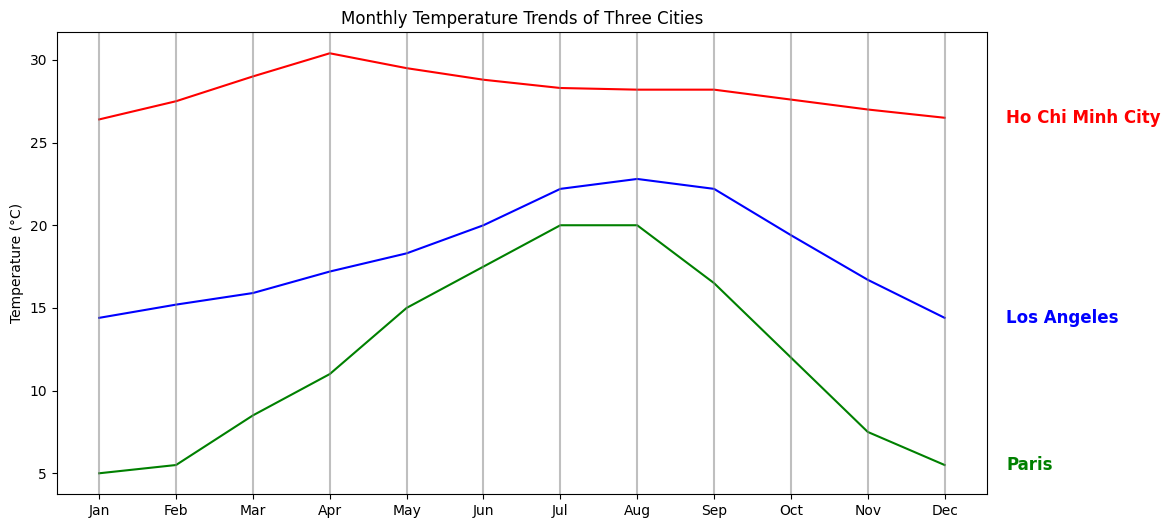

In [151]:
df = pd.DataFrame([City1, City2, City3], columns=months)

# Add city names into the "City" column
city_names = ["Ho Chi Minh City", "Los Angeles", "Paris"]
df.insert(0, "City", city_names)

# Colors for each city
colors = ["red", "blue", "green"]

# Create the line plot for each city
plt.figure(figsize=(12, 6))

# Plot the temperature trend lines for each city
for i, city in enumerate(df["City"]):
    plt.plot(df.columns[1:], df.iloc[i, 1:], label=city, color=colors[i])

# Add vertical grid lines
for i in range(len(months)):
    plt.axvline(x=i, color='gray', linestyle='-', alpha=0.5)

# Add city labels on the right side of the plot
for i, city in enumerate(df["City"]):
    plt.text(x=len(df.columns) - 1.2, y=df.iloc[i, -1], s=city, fontsize=12, fontweight="bold", color=colors[i], verticalalignment="center")

# Set title and axis labels
plt.title("Monthly Temperature Trends of Three Cities")
plt.ylabel("Temperature (°C)")
plt.xticks(rotation=0)
plt.grid(alpha=0)

# Hide legend inside the plot
plt.legend().set_visible(False)

# Show the plot
plt.show()
